# PYTHON - SCALA - VEGA SPEC


En este notebook se muestra como podemos mezclar 3 idiomas, estableceremos una relación **PYTHON - SCALA - VEGA SPEC**.

> ***Ejercicio:*** Combinar Python,Scala y Vega Spec.
>
>> ***Requisitos:***
>>
>> - **1.** Leer un archivo 'csv' que contiene los datos de todos los jugadores que participaron en el ultimo mundial.
>> - **2.** Guardar los datos de cada jugador en MongoDB.
>> - **3.** Generar 3 selecciones de manera aleatoria y determinar la selección que convirtió mas goles.
>> - **4.** Graficar las 3 selecciones generadas, donde se detalle el nombre y el numero de goles convertidos de cada selección.

#### CÓDIGO PYTHON

* Definimos una clase llamada `Player` con su constructor por defecto que se encarga de inicializar todos los atributos definidos para un `Player`.
* Además sobre escribimos el metodo `__str__ `propio de ***python*** para darle el formato que deseemos a la manera de como se presenta un objeto, en este caso de tipo **Player**.

In [1]:
# Clase player
class Player(object):

	# Contructor sobre cargado
	def __init__(self, numFifa,displayName,country,lastName,
		firstName,shirtName,dateBirth,position,club,height,
		caps,goals):
		
		self.numFifa = int(numFifa)
		self.displayName = displayName
		self.country = country
		self.lastName = lastName
		self.firstName = firstName
		self.shirtName = shirtName
		self.dateBirth = dateBirth
		self.position = position
		self.club = club
		self.height = float(height)
		self.caps = caps
		self.goals = int(goals)
	
	# Sobre escribimos el metodo __str__()
	def __str__(self):
		return "numFifa: %d - displayName: %s - country: %s", 
		"lastName: %s firstName: %s - shirtName: %s",
		" - dateBirth: %s - position: %s - club: %s",
		" - height: %f - caps: %s - goals: %d"%(self.numFifa,
			self.displayName,self.country,self.lastName,
			self.firstName,self.shirtName,self.dateBirth,
			self.position,self.club,self.height,self.caps,
			self.goals)

#### CÓDIGO SCALA

* En la variable `dataStr` guardamos lo que se obtiene al momento de leer un archivo con **scala**,en este caso guardamos un ***string*** por lo tanto puede ser interpretada y manipulada con ***python***.

In [2]:
/*
    La variable 'dataStr' es definida con 'scala' cuyo tipo de dato
    es 'string' y por lo tanto puede ser interpretado con 'python'.
*/
val dataStr = scala.io.Source.fromFile("data/mundial.csv").mkString

#### CÓDIGO PYTHON

* Con la ayuda de la librería ***pymongo*** realizamos una conexión con **MongoDB** y obtenemos una colección para trabajar con ella. 

In [3]:
from pymongo import MongoClient

# Conexión al Server de MongoDB Pasandole el host y el puerto
mongoClient = MongoClient('localhost',27017)

# Conexión a la base de datos
db = mongoClient.Player

# Obtenemos una coleccion para trabajar con ella
collection = db.Players

#### CÓDIGO PYTHON

* Establecemos un método llamado `insertPlayer()` que recibe todos los datos de un jugador leídos desde el 'csv' donde creamos un diccionario llamado `dictPlayer` e insertamos este diccionario a la base de datos.



In [14]:
# Metodo que permite insertar cada jugador en la base de datos
def insertPlayer(numFifa, displayName, country, lastName, firstName,
    shirtName, dateBirth, position, club, height, caps, goals):

    # diccionario
    dictPlayer = {
        'numFifa': numFifa,'displayName':displayName,
        'country':country,'lastName':lastName,'firstName':firstName,
        'shirtName':shirtName,'dateBirth':dateBirth,
        'position':position,'club':club,'height':height,'caps':caps,
        'goals':goals
        }

    # Insertamos la coleccion en mongoDB    
    collection.insert(dictPlayer)

#### CÓDIGO PYTHON

* A la variable `dataStr` que fue definida con **scala** la manipulamos para generar una lista de listas que contienen los datos de cada jugador leído desde el 'csv'.
* Por cada fila que se encuentra en `data`, es decir cada fila contiene los datos de un jugador, llamamos al método `insertPlayer()` para poder insertar cada registro de un jugador en la base de datos.



In [4]:
# Separamos por salto de linea (\n) cada registro
data = dataStr.split('\n')

# Usando comprensión de listas, separamos cada registro por el
# caracter '|'.
data = [x.split('|') for x in data]

# Eliminamos los encabezados
data = data[1:len(data) - 1]

for row in data:
     # Llamamos al metodo 'insertPlayer()'
     insertPlayer(row[0],row[1],row[2],row[3],row[4],row[5],row[6],
          row[7],row[8],row[9],row[10],row[11])


#### CÓDIGO PYTHON

* Definimos un método llamado `getGoalsBySelecction` que recibe dos listas, una de jugadores y otra de los países que participaron en el mundial. Este método se encarga de generar y devolver una **lista de tuplas** que contiene el ***nombre del país*** y el ***numero de goles*** que ha marcado.



In [5]:
# Metodo que permite calcular el numero de goles de cada selección
def getGoalsBySelecction(players,countries):
    listGoals = []
    for country in countries:
        goals = 0
        for player in players:
            if(player.country == country):
                goals += player.goals
        # Agregamos a lista una tupla.
        listGoals.append((country,goals))
    return listGoals

#### CÓDIGO PYTHON

* Obtenemos todos los jugadores registrados desde mongoDB y creamos los objetos de tipo `Player`.
*  Guardamos en `countries` una lista ordenada por orden albafético de los países únicos que participaron en mundial.
* En `countriesGoals` guardamos la lista de tuplas que devuelve el metodo `getGoalsBySelecction`.



In [6]:
# Obtenemos la colección de mongoDB
collPlayers = collection.find()
players = []

for x in collPlayers:
    # Creamos los objetos de tiplo 'Player'
    objPlayer = Player(x['numFifa'],x['displayName'],x['country'],x['lastName'],x['firstName'],x['shirtName'],
    x['dateBirth'],x['position'],x['club'],x['height'],x['caps'],x['goals'])
    
    # Agregamos a lista el objeto de tipo 'Player'
    players.append(objPlayer)  

# Obtenemos una lista ordenada de los paises sin repetirse
countries = sorted(set([player.country for player in players]))

# Obtenemos el nombre del pais y el numero de goles marcados.
countriesGoals = getGoalsBySelecction(players,countries)


#### CÓDIGO PYTHON

* Con la ayuda de la librería ***random.sample*** obtenemos de manera aleatoria 3 países con el numero de goles que se encuentran almacenados en `countriesGoals.`



In [7]:
from random import sample
# Obtenemos de manera aleatoria 3 paises de 'countriesGoals'
countriesSelecteds = sample(countriesGoals,3)
print(countriesSelecteds)

[('IR Iran', 222), ('Portugal', 284), ('Poland', 252)]


#### CÓDIGO PYTHON

* Las variables definidas en esta celda serán manipularlas con el lenguaje scala para generar **tuplas** propias de scala.



In [8]:
# Variables que guardan los nombres de los países que se encuentran
# en 'countriesSelecteds'
countryName1 = countriesSelecteds[0][0]
countryName2 = countriesSelecteds[1][0]
countryName3 = countriesSelecteds[2][0]

# Variables que guardan los goles de los países que se encuentran
# en 'countriesSelecteds'
countryGoal1 = countriesSelecteds[0][1]
countryGoal2 = countriesSelecteds[1][1]
countryGoal3 = countriesSelecteds[2][1]

# Obtenemos el el numero de goles mas alto de las 3 selecciones
countryMaxGoals = max([goal for (country,goal) in countriesSelecteds])


#### CÓDIGO SCALA

* Generamos tuplas en **scala** a partir de las variables definidas en la celda anterior con **python.**
* Definimos un método llamado `getMaximunGoals` que se encargará de encontrar de los 3 países, el país que ha marcado mas goles. 



In [9]:
// Tuplas que contienen el nombre y el numero de goles de cada país.
val country1 = (countryName1,countryGoal1.toInt)
val country2 = (countryName2,countryGoal2.toInt)
val country3 = (countryName3,countryGoal3.toInt)

// Llamamos al metodo para obtener el país que marcó mas goles
getMaximunGoals()

/* 
    Metodo que permite obtener de los 3 países seleccionados, 
    el país que convirtió el mayor número de goles.
*/

def getMaximunGoals(){    
    if(country2._2 > country1._2) println(country2)
    else if (country3._2 > country1._2) println(country3)
    else println(country1)
}


(Germany,318)


#### CÓDIGO VEGA SPEC

* Definimos un gráfico de barras que mostrará el nombre de las 3 selecciones y el numero de goles que ha marcado cada país.



```bash
{
  "$schema": "https://vega.github.io/schema/vega/v5.json",
  "width": 400,
  "height": 300,
  "padding": 5,
  "autosize":"pad",
  "data": [
    {
      "name": "data_countries",
      "values": [
        {"category": country1._1, "position":0,"value": country1._2},
        {"category": country2._1,"position":1, "value": country2._2},
        {"category": country3._1, "position":2,"value": country3._2}
      ]
    }
  ],

  "scales": [
    {
      "name": "yscale",
      "type": "band",
      "domain": {"data": "data_countries", "field": "category"},
      "range": "height",
      "padding": 0.2
    },
    {
      "name": "xscale",
      "type": "linear",
      "domain": {"data": "data_countries", "field": "value"},
      "range": "width",
      "round": true,
      "zero": true,
      "nice": true
    },
    {
      "name": "color",
      "type": "ordinal",
      "domain": {"data": "data_countries", "field": "position"},
      "range": {"scheme": "category20"}
    }
  ],

  "axes": [
    {"orient": "left", "scale": "yscale","tickSize": 0, "labelPadding": 4, "zindex": 1},
    {"orient": "bottom", "scale": "xscale"}
  ],

  "marks": [
    {
      "type": "group",

      "from": {
        "facet": {
          "data": "data_countries",
          "name": "facet",
          "groupby": "category"
        }
      },

      "encode": {
        "enter": {
          "y": {"scale": "yscale", "field": "category"}
        }
      },

      "signals": [
        {"name": "height", "update": "bandwidth('yscale')"}
      ],

      "scales": [
        {
          "name": "pos",
          "type": "band",
          "range": "height",
          "domain": {"data": "facet", "field": "position"}
        }
      ],

      "marks": [
        {
          "name": "bars",
          "from": {"data": "facet"},
          "type": "rect",
          "encode": {
            "enter": {
            "y": {"scale": "pos", "field": "position"},
            "height": {"scale": "pos", "band": 1},
            "x": {"scale": "xscale", "field": "value"},
            "x2": {"scale": "xscale", "value": 1},
            "fill": {"scale": "color","field": "position"}
            }
          }
        },
        {
          "type": "text",
          "from": {"data": "bars"},
          "encode": {
            "enter": {
              "x": {"field": "x2", "offset": -5},
              "y": {"field": "y", "offset": {"field": "height", "mult": 0.5}},
              "fill": [
                {"value": "black"}
              ],
              "align": {"value": "right"},
              "baseline": {"value": "middle"},
              "text": {"field": "datum.value"}
            }
          }
        }
      ]
    }
  ],
  "config": {}
}
```

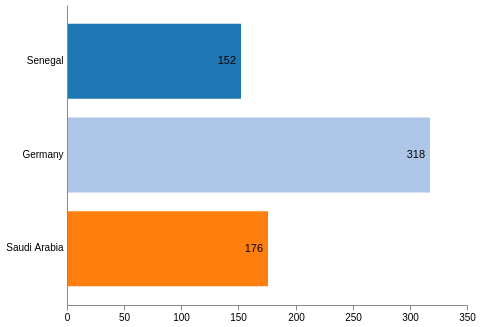